# Natural Language Process - Celebrity Interviews Project Part 3

Part 3 of this project, we make use of rule based approach TFIDFVectorizer() to determine the number of clusters from the corpus. We use two clustering algorithms **1. MiniBatchKMeans and 2. K-Means++** and compare simlarity of clusters. These clusters are basically the documents that coalesce to having the greatest degree of similarity.


**The project Objectives for Part 3 of this project :**

**1. Cluster Analysis of Text**
- Derive meaning of clusters and Output most frequent terms per cluster

i) MiniBatchKMeans
- This algorithm basically works by updating cluster centroids based on a random subset (or "batch") of the data, instead of the entire dataset. Ideal for large datasets. 

ii) K-Means++
- This algorithm is an improved version of KMeans. It chooses the initial centroids such that they are well-spread across the data. The first centroid is chosen randomly, and then subsequent centroids are chosen such that they are as far away as possible from the already selected centroids.


### Libraries

In [1]:
import math
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [4]:
# import dataset tokenised_data
import pickle 
with open("outputs/tokenised_data.pkl", "rb") as fp:
    Interview_data = pickle.load(fp)

In [5]:
# Review dataset
Interview_data.head()

,Name,Profession,Origional Text,Tokenised Text,Preprocessed Text
0,Alvaro Morata,Footballer,in spain all the children played football esp...,"[spain, children, played, football, especially...",spain children played football especially scho...
1,Anna Petryk,Footballer,didnt want to change my team but the situati...,"[want, change, team, situation, made, russia, ...",want change team situation made russia invaded...
2,Ben Chilwell,Footballer,must admit when walked into the store was ...,"[must, admit, walked, store, little, nervous, ...",must admit walked store little nervous many pe...
3,Bruno Fernandes,Footballer,you could feel it between us between the fans...,"[could, feel, fans, atmosphere, like, getting,...",could feel fans atmosphere like getting back p...
4,Cesar Azpilicueta,Footballer,when arrived here wanted to become an impor...,"[arrived, wanted, become, important, player, c...",arrived wanted become important player club ob...


In [6]:
add_stop_words = ['like','think','people','one','time','know','really','always','lot','get']

# Adding to stop words list
# these stopwords will be included as a parameter when creating TFIDFVectorizer
from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

## TfidfVectorizer() model

In [7]:
# Tf idf
tfidf_vectorizer = TfidfVectorizer(
    min_df = 5,
    max_df = 0.85,
    max_features = 8000,
    stop_words = stop_words
)

tfidf_vectorizer.fit(Interview_data['Preprocessed Text'])
text = tfidf_vectorizer.transform(Interview_data['Preprocessed Text'])

vectorized_text = tfidf_vectorizer.fit_transform(Interview_data['Preprocessed Text'])

# 1. Clustering using MiniBatchKMeans

### Optimal number of Clusters

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


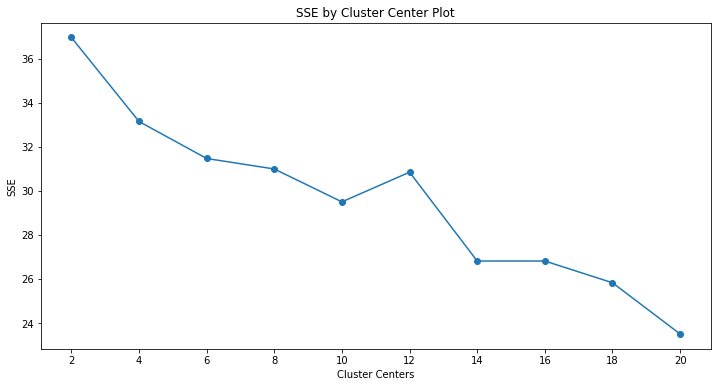

In [8]:
# look for optimal no of clusters
plt.rcParams['figure.figsize'] = [12,6]
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=40, batch_size=10, random_state=7000).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

## Top Terms per Cluster using MiniBatchKMeans

In [9]:
# top keywords based on their TFIDF score to see if we can spot any trends
# set k to 6
clusters = MiniBatchKMeans(n_clusters=6, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i+1))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf_vectorizer.get_feature_names(), 15)


Cluster 1
story,women,got,right,fun,life,things,feel,characters,character,film,love,kind,movie,going

Cluster 2
fans,player,important,playing,life,games,says,day,league,game,play,club,team,players,football

Cluster 3
art,meaning,writing,self,new,learning,happy,anxiety,happiness,realized,thought,laugh,purpose,thinking,life

Cluster 4
national,need,final,premier,life,happy,goal,game,madrid,real,play,team,country,league,football

Cluster 5
product,feel,passed,anxiety,help,let,live,producers,hard,wanted,impact,wife,believe,inspire,god

Cluster 6
writing,kids,kind,laugh,say,mean,tour,yeah,feel,album,life,going,love,song,music


C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 2. Clustering using K-means++

### Optimal number of Clusters 

Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters


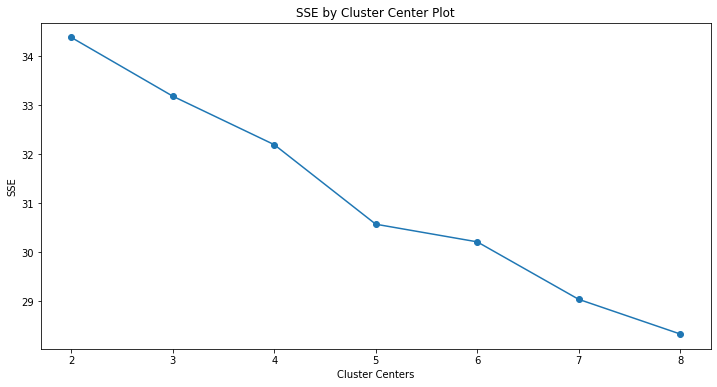

In [10]:
# look for optimal no of clusters
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k,random_state=7000).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 8)

## Top Terms per Cluster using K-Means++

In [11]:
# top keywords based on their TFIDF score to see if we can spot any trends using kmeans++

def get_top_keywords(data, true_k ,labels, n_terms):
    
    model = KMeans(n_clusters = true_k, init="k-means++", max_iter=100, n_init=1,random_state=20)
    model = model.fit(text)

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    for i in range(true_k):
        print(f"Cluster {i+1}") # printing each cluster number
        print(', '.join([labels[ind] for ind in order_centroids[i, :n_terms]]))
    

get_top_keywords(text, 6, tfidf_vectorizer.get_feature_names(), 15)

Cluster 1
god, inspire, believe, wife, impact, wanted, hard, producers, live, let, help, anxiety, passed, feel, product
Cluster 2
movie, going, film, kind, character, characters, movies, story, women, feel, love, got, life, great, laughs
Cluster 3
going, things, mind, point, human, mental, feel, bad, trying, got, health, questions, probably, love, dad
Cluster 4
football, team, league, play, country, game, players, real, madrid, happy, goal, life, barcelona, national, great
Cluster 5
love, music, life, album, feel, things, going, laugh, self, kind, kids, right, house, thing, say
Cluster 6
football, players, club, team, play, game, league, says, games, life, fans, day, different, playing, world


## Analysis of Clusters

Since our dataset is relatively small as excepted, both models produce similar results i.e., similarity of clusters was derived with optimal number of clusters being 6. 

- Cluster 1 - Football (Important games fans) 
- Cluster 2 - Music (album, song writing & tours)
- Cluster 3 - Football (clubs,national team, players)
- Cluster 4 - Movies (Film, movie story and characters, producers)
- Cluster 5 - Depression (Anxiety for prodcuers and wife, help & believing in God)
- Cluster 6 - Art, writing, mental health and human mind. happiness, purpose and meaning of life


## Saving Clusters to a txt FILE

In [12]:
# top keywords based on their TFIDF score to see if we can spot any trends using kmeans++
# we initiate k = 6
true_k = 6
model = KMeans(n_clusters = true_k, init="k-means++", max_iter=100, n_init=1,random_state=20)
model.fit(text)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()

# write our clusters to .txt file
with open("Kmeans Clusters.txt", "w", encoding="utf-8") as f:
    f.write('RESULTS OF CLUSTERS using KMeans++ Clustering Algorithm')
    f.write("\n\n")
   
    for i in range(true_k):
        f.write(f"Cluster {i+1}") # number of cluster iteration
        f.write("\n")

        for ind in order_centroids[i, :12]:
            f.write(terms[ind]) # save top words as a cluster in a .txt file in directory
            f.write("\n")
        f.write("\n")

In [13]:
# top keywords based on their TFIDF score to see if we can spot any trends using kmeans++

# set k to 6
clusters = MiniBatchKMeans(n_clusters=6, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)
n_terms = 15
labels = tfidf_vectorizer.get_feature_names()
df = pd.DataFrame(text.todense()).groupby(clusters).mean()


# write our clusters to .txt file
with open("MiniBatchKMeans Clusters.txt", "w", encoding="utf-8") as f:
    f.write('RESULTS OF CLUSTERS using MiniBatchKMeans Clustering Algorithm')
    f.write("\n\n")
    
    for i,r in df.iterrows():
        f.write('\nCluster {}'.format(i+1))
        f.write("\n")
        
        for t in np.argsort(r)[-n_terms:]:
            f.write(str(labels[t]))
            f.write("\n")
        f.write("\n")  

# Visualisation Of Clusters

C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.

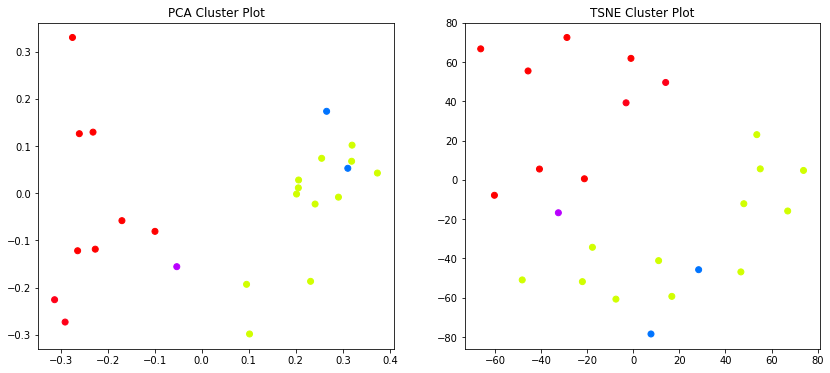

In [21]:
# plot the output
# PCA is better at capturing global structure of the data
# TSNE is better at capturing relations between neighbors
# sample from 48 documents and perform a PCA 24 dimension reduction on the data
# next we show a scatterplot further sampling the sample down to 10 pts
import warnings
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=48, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=5).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=24, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')


plot_tsne_pca(text, clusters)